# Black-Scholes-Merton Model

Black–Scholes–Merton model is a mathematical model for the dynamics of a financial market containing derivative investment instruments. From the partial differential equation in the model, known as the <b>Black–Scholes equation </b>, one can deduce the Black–Scholes formula, which gives a theoretical estimate of the price of European-style options. 

For a European call or put on an underlying stock paying no dividends, the <b>Black–Scholes equation </b>is:

$${\frac {\partial V}{\partial t}}+{\frac {1}{2}}\sigma ^{2}S^{2}{\frac {\partial ^{2}V}{\partial S^{2}}}+rS{\frac {\partial V}{\partial S}}-rV=0$$

where V is the price of the option as a function of stock price $S$ and time $t$, $r$ is the risk-free interest rate, and $\sigma$  is the volatility of the stock.

**Hypothesis  made on the assets**
1. <b>Riskless rate</b> : The rate of return on the riskless asset is constant and thus called the risk-free interest rate.
2. <b>Random walk</b> : The instantaneous log return of stock price is an infinitesimal random walk with drift; more precisely, the stock price follows a <b> geometric Brownian motion</b>, and we will assume its drift and volatility are constant (if they are time-varying, we can deduce a suitably modified Black–Scholes formula quite simply, as long as the volatility is not random).
3. The stock does not pay a dividend.

**Geometric Brownian motion(GBM)**

A stochastic process St is said to follow a GBM if it satisfies the following stochastic differential equation (SDE):

$$dS_{t}=\mu S_{t}\,dt+\sigma S_{t}\ dW_{t}$$

where $W_{t}$ is a Wiener process or Brownian motion, and $\mu$  ('the percentage drift') and $\sigma$  ('the percentage volatility') are constants.

The former is used to model deterministic trends, while the latter term is often used to model a set of unpredictable events occurring during this motion.

**Black-Scholes formula**

The Black-Scholes call formula is: $$C(S_{t},t) = S_tN(d_1) - \frac{K}{e^{r(T-t)}} N(d_2)$$  
Where $S_t$ is the stock price  
$N(*)$ is the cumulative distribution function of the standard normal distribution (Don't worry scipy does this part)  
$K$ is the strike price  
$r$ is the risk free rate (annual rate)  
$T - t$ is the time to maturity (in years)  
$\sigma$ is the volatility of the stock (aka standard deviation of the asset returns)

 and 
$$d_1 = \frac{ln(\frac{s}{K}) + (r + \frac{\sigma^2}{2}) (T-t)}{\sigma \sqrt{T-t}}$$  
$$d_2 = d_1 - \sigma \sqrt{T-t} = \frac{ln(\frac{s}{K}) + (r - \frac{\sigma^2}{2}) (T-t)}{\sigma \sqrt{T-t}}$$  

The price of a corresponding put option based on put–call parity with discount factor $e^{{-r(T-t)}}$ is:

$$P(S_{t},t) =\frac{K}{e^{r(T-t)}}-S_{t}+C(S_{t},t) = N(-d_{2})\frac{K}{e^{r(T-t)}}-N(-d_{1})S_{t}$$

**Side Note**  
If these were dividend paying stocks the $d_1$ and $d_2$ would be slightly different and look like this:  
$$d_1 = \frac{ln(\frac{s}{K}) + (r - q + \frac{\sigma^2}{2}) (T-t)}{\sigma \sqrt{T-t}}$$  
$$d_2 = \frac{ln(\frac{s}{K}) + (r - q - \frac{\sigma^2}{2}) (T-t)}{\sigma \sqrt{T-t}}$$  
Where $q$ is the dividend rate

**Put–call parity**


$$ C-P= D(F-K)$$

where
C is the (current) value of a call, P is the (current) value of a put, D is the discount factor, F is the forward price of the asset, and K is the strike price.

In [1]:
import warnings
warnings.filterwarnings ('ignore') 
from scipy import log,exp,sqrt,stats, random
import numpy as np
import matplotlib.pyplot as plt
random.seed(42)

In [2]:
def Nd1(S,K,T,r,sigma):    
    return (log(S/K)+(r+sigma*sigma/2.)*T)/(sigma*sqrt(T))

def Nd2(S,K,T,r,sigma):
    d1 = Nd1(S,K,T,r,sigma) 
    return d1-sigma*sqrt(T)

def call(S,K,T,r,sigma):
    d1 = Nd1(S,K,T,r,sigma)
    d2 = Nd2(S,K,T,r,sigma)
    c = (S*stats.norm.cdf(d1))-(K*exp(-r*T)*stats.norm.cdf(d2))
    return c

def put(S,X,T,r,sigma):
    p= X*exp(-r*T)-S+call(S,X,T,r,sigma)    
    return p

def monte_carlo_path_simulator(S, T, r, sigma, steps, N):
    dt = T/steps       
    ST = np.log(S) +  np.cumsum(((r - sigma**2/2)*dt +sigma*np.sqrt(dt) * np.random.normal(size=(steps,N))),axis=0)    
    return np.exp(ST)

In [3]:
S = 100 # stock price
K = 110 # strike price
T = 0.5 # maturaty period
r = 0.05 # risk free risk in annual %
sigma = 0.15 # annual volatility in %
steps = 100 # time steps 
N = 1000 # number of trials or simulation

### 1. Call Option 

$$C = max(S_t - K, 0)$$  
Where

$S_T$ is the price of the underlying stock on the maturity date  
$K$ is the strike price  

Black-Scholes Price is : 1.6694116737513873
Simulated price is : 1.6780242988385394


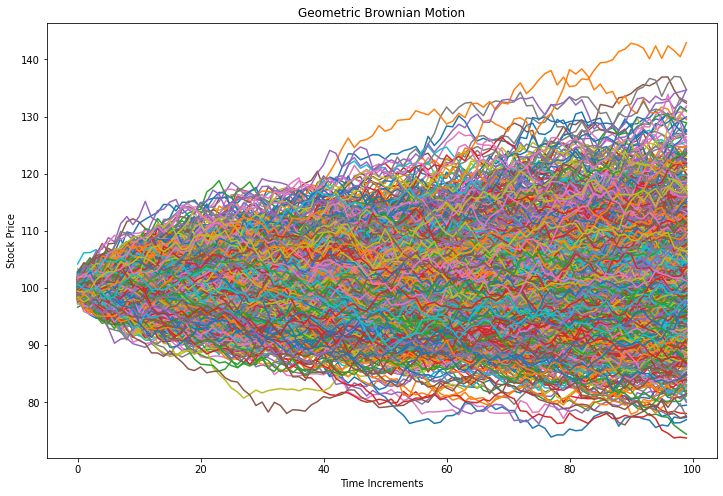

In [4]:
sim_call_array = monte_carlo_path_simulator(S, T, r, sigma, steps, N)
C = np.maximum(sim_call_array[-1]-K, 0)
sim_option_price = np.mean(C)*np.exp(-r*T)
c_bs = call(S,K,T,r,sigma)
print("Black-Scholes Price is :", c_bs)
print("Simulated price is :", sim_option_price)

# plot
plt.figure (figsize = (12,8))
plt.plot(sim_call_array);
plt.xlabel("Time Increments")
plt.ylabel("Stock Price")
plt.title("Geometric Brownian Motion")
plt.show()

### Distribution of $S_t$

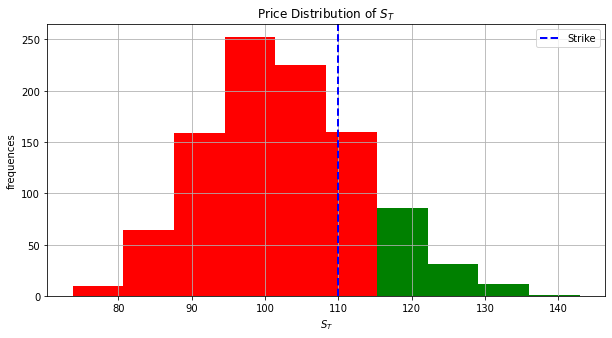

In [5]:
plt.figure(figsize=(10,5))
n, bins, patches = plt.hist(sim_call_array[-1], bins=10);
for c, p in zip(bins, patches):
    if c > K:
        plt.setp(p, 'facecolor', 'green')
    else:
        plt.setp(p, 'facecolor', 'red')

plt.axvline(K, color='blue', linestyle='dashed', linewidth=2,label="Strike")        
plt.title('Price Distribution of $S_{T}$')
plt.grid(True)
plt.xlabel('$S_{T}$')
plt.ylabel('frequences')
plt.legend()

### Distribution of $S_{max}$

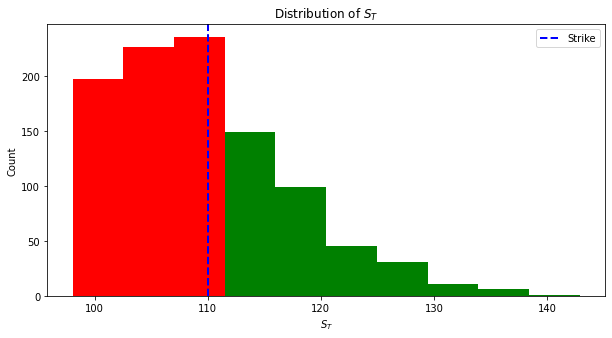

In [6]:
plt.figure(figsize=(10,5))
max_=np.max(sim_call_array,axis=0)
n, bins, patches = plt.hist(max_,bins=10);
for c, p in zip(bins, patches):
    if c > K:
        plt.setp(p, 'facecolor', 'green')
    else:
        plt.setp(p, 'facecolor', 'red')
plt.axvline(K, color='blue', linestyle='dashed', linewidth=2,label="Strike")
plt.title("Distribution of $S_{T}$")
plt.xlabel("$S_{T}$")
plt.ylabel('Count')
plt.legend()

### 2. Put Option

$$P = max(K-S_t, 0)$$ 

In [7]:
S = 110 # stock price
K = 100 # strike price
T = 0.5 # maturaty period
r = 0.05 # risk free risk in annual %
sigma = 0.15 # annual volatility in %
steps = 100 # time steps 
N = 100 # number of trials or simulation

Black Scholes Price is : 0.7034814673135088
Simulated price is : 0.6448887832636472


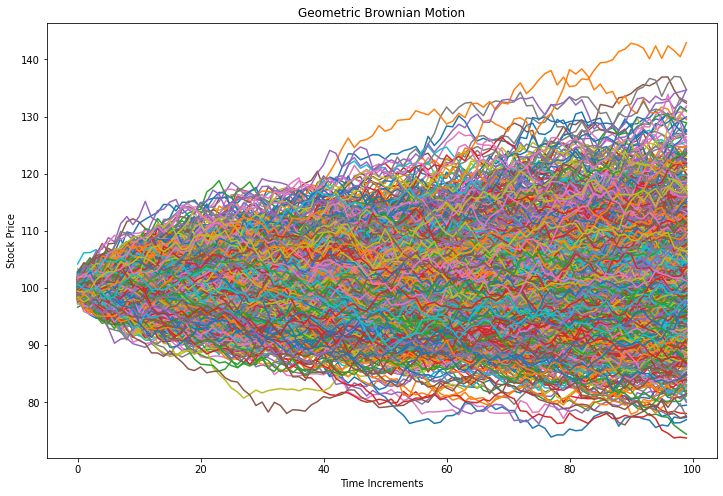

In [8]:
sim_put_array = monte_carlo_path_simulator(S, T, r, sigma, steps, N)
P = np.maximum(K-sim_put_array[-1], 0)
sim_option_price = np.mean(P)*np.exp(-r*T) #discounting back to present value

put_bs = put(S,K,T,r,sigma)
print("Black Scholes Price is :", put_bs)
print("Simulated price is :", sim_option_price)

# plot
plt.figure (figsize = (12,8))
plt.plot(sim_call_array);
plt.xlabel("Time Increments")
plt.ylabel("Stock Price")
plt.title("Geometric Brownian Motion")
plt.show()

## 2. European options with known dividends

### 1.Call Option 

In [9]:
S0 = 100 # stock price
K = 110 # strike price
T = 0.5 # maturaty period
r = 0.05 # risk free risk in annual %
sigma = 0.2 # annual volatility in %
div = 1.5

S=S0-exp(-r*T*div)
c = call(S,K,T,r,sigma)
print("Call Option:", round(c,3))

Call Option: 2.596


###  2. Put Option

In [10]:
S0 = 110 # stock price
K = 100 # strike price
T = 0.5 # maturaty period
r = 0.05 # risk free risk in annual %
sigma = 0.2 # annual volatility in %
div = 1.5

S=S0-exp(-r*T*div)
p = put(S,K,T,r,sigma)
print("Put Option:", round(p,3))

Put Option: 1.786
